In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = pd.read_excel('multi_linear_Data.xlsx')
df1 = pd.DataFrame(data)
df1.head()


,Unnamed: 0,Number of student,Number of subject,Marks obtained
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,10.0,2.0,14.0
3,NaN,30.0,5.0,12.0
4,NaN,60.0,7.0,18.0


In [3]:
df1.isnull().sum()

df2 = df1.drop(columns='Unnamed: 0')
df2.dropna(inplace=True)

In [4]:
df2.isnull().sum()

Number of student    0
Number of subject    0
Marks obtained       0
dtype: int64

In [5]:
df2.head(10)

,Number of student,Number of subject,Marks obtained
2,10.0,2.0,14.0
3,30.0,5.0,12.0
4,60.0,7.0,18.0
5,20.0,8.0,16.0
6,15.0,9.0,15.0
7,40.0,1.0,16.0
8,38.0,3.0,17.0
9,80.0,12.0,60.0
10,90.0,34.0,68.0
11,10.0,1.0,14.0


In [6]:
print(len(df2))

23


In [7]:
df3 = df2.duplicated(subset=['Marks obtained'])
df3 = df2.drop_duplicates(subset=['Marks obtained'],keep='last')
print(len(df3))

18


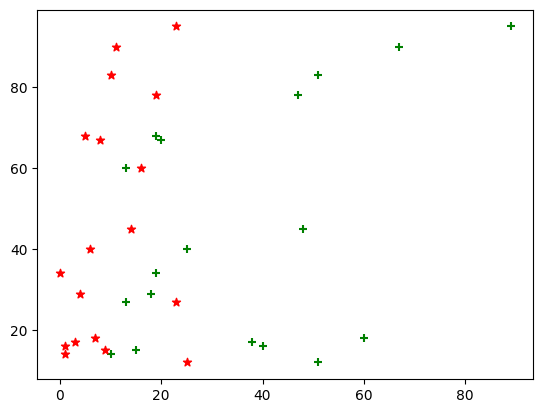

In [10]:
plt.scatter(df3['Number of student'],df3['Marks obtained'],color='g',marker='+')
plt.scatter(df3['Number of subject'],df3['Marks obtained'],color='red',marker='*')
plt.show()

In [9]:
reg = LinearRegression()
X = df3[['Number of student','Number of subject']]
y = np.asanyarray(df3['Marks obtained'])
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2,random_state=0)



In [10]:
X.shape

(18, 2)

In [11]:
print("X_train:",Xtrain.shape)
print("X_test:",Xtest.shape)
print("Y_train:",ytrain.shape)
print("Y_test:",ytest.shape)

X_train: (14, 2)
X_test: (4, 2)
Y_train: (14,)
Y_test: (4,)


In [12]:
model = reg.fit(Xtrain,ytrain)
print(Xtest)

    Number of student  Number of subject
6                15.0                9.0
13               19.0                0.0
15               20.0                8.0
17               19.0                5.0


In [13]:
y_pred = reg.predict(Xtest)
print(y_pred)

[26.71288603 21.35606544 28.87679872 25.67798662]


In [14]:
print('Intercept: ',reg.intercept_)
print('Coefficints: ',reg.coef_)

Intercept:  9.848537112480408
Coefficints:  [0.60565939 0.86438424]


Text(0, 0.5, 'Predicted')

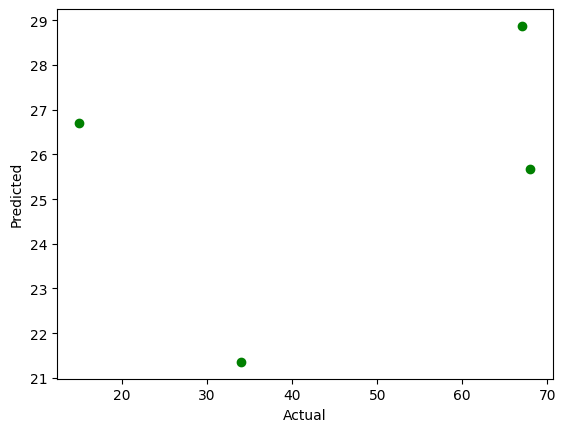

In [15]:
plt.scatter(ytest,y_pred,color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

 Accuracy of the model is -74.46


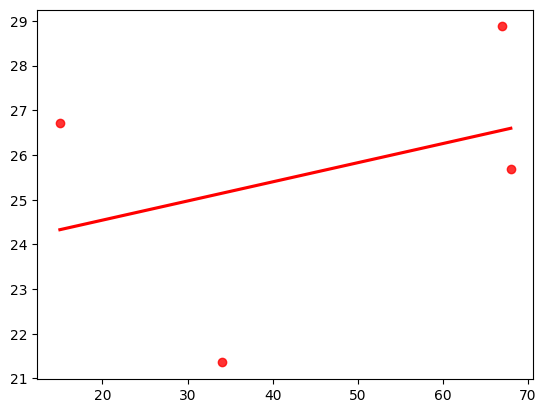

In [18]:
from sklearn.metrics import r2_score
import seaborn as sns

Accuracy=r2_score(ytest,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)
sns.regplot(x=ytest,y=y_pred,ci=None,color ='red')
plt.show()